In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing  import OneHotEncoder  
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-data-set/loan_data_set.csv


In [5]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [6]:
dataset = pd.read_csv(r"/kaggle/input/loan-data-set/loan_data_set.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


FINDING AND REMOVING NULL VALUES :

In [7]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
en_data = dataset[["Gender","Married"]]
pd.get_dummies(en_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gender_Female  614 non-null    bool 
 1   Gender_Male    614 non-null    bool 
 2   Married_No     614 non-null    bool 
 3   Married_Yes    614 non-null    bool 
dtypes: bool(4)
memory usage: 2.5 KB


In [10]:
dataset["Married"].fillna(dataset["Married"].mode()[0],inplace=True)

ONE HOT ENCODING : [CONVERING CATEGORY INTO NUMERICAL]

In [15]:
from sklearn.preprocessing  import OneHotEncoder 
ohe = OneHotEncoder ()
ar = ohe.fit_transform(en_data).toarray()


In [12]:
pd.DataFrame(ar,columns=["Gender_Female","Gender_Male","Married_No","Married_Yes",])

,Gender_Female,Gender_Male,Married_No,Married_Yes
0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
609,0.0,0.0,0.0,0.0
610,1.0,0.0,1.0,0.0
611,1.0,0.0,1.0,0.0
612,1.0,0.0,1.0,0.0


LABEL ENCODING :

In [29]:
df = pd.DataFrame({"name":["Vinayak","cow","dog","cat","black"]})
df 



,name
0,Vinayak
1,cow
2,dog
3,cat
4,black


In [30]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df["en_name"] = le.fit_transform(df["name"])
df

,name,en_name
0,Vinayak,0
1,cow,3
2,dog,4
3,cat,2
4,black,1


ORDINAL ENCODING (SAME CATEGORY) : 

In [7]:
df = pd.DataFrame ({"Size":["s","m","l","xl","s","m","l","s","s","l","xl","m"]})
df.head(3)
ord_data = [["s","m","","l","xl"]]
from sklearn.preprocessing import OrdinalEncoder 
oe = OrdinalEncoder(categories = ord_data)

df["Size_en"] = oe.fit_transform(df[["Size"]])
df

,Size,Size_en
0,s,0.0
1,m,1.0
2,l,3.0
3,xl,4.0
4,s,0.0
5,m,1.0
6,l,3.0
7,s,0.0
8,s,0.0
9,l,3.0


OUTLIER : 

In [5]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


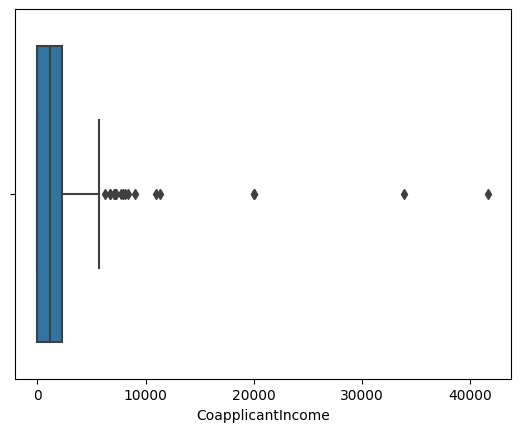

In [7]:
sns.boxplot(x="CoapplicantIncome",data=dataset)
plt.show()

In [9]:
dataset.shape

(614, 13)

REMOVING OUTLIER USING IQR :

In [15]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q1
q3 = dataset["CoapplicantIncome"].quantile(0.75)
q3
IQR = q3-q1
min_range = q1 - (IQR*1.5)
max_range = q3 + (IQR*1.5)
min_range,max_range

(-3445.875, 5743.125)

In [19]:
new_dataset =  dataset[dataset["CoapplicantIncome"]<= max_range]
new_dataset.shape

(596, 13)

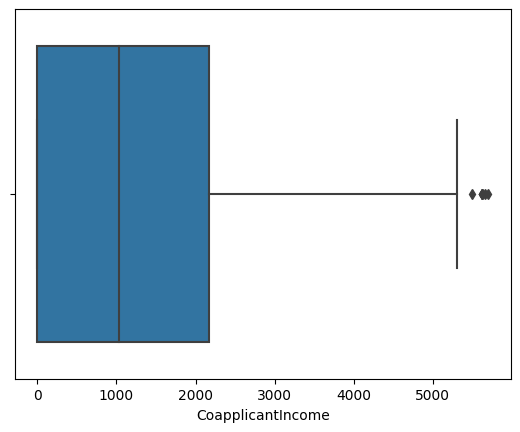

In [21]:
sns.boxplot(x="CoapplicantIncome",data=new_dataset) 
plt.show()

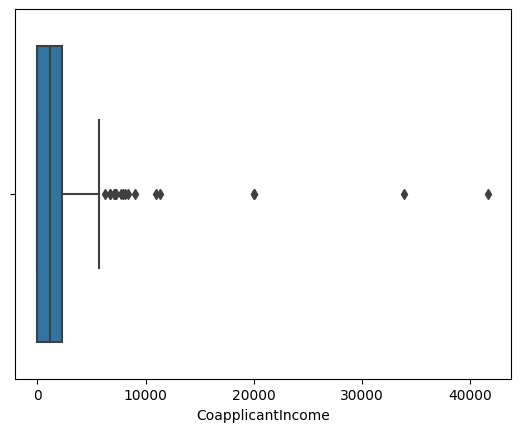

In [9]:
sns.boxplot(x="CoapplicantIncome",data=dataset)
plt.show()

In [6]:
min_range =dataset["CoapplicantIncome"].mean() - (3*dataset["CoapplicantIncome"]).std()
max_range =dataset["CoapplicantIncome"].mean() + (3*dataset["CoapplicantIncome"]).std()
min_range , max_range

(-7157.499309645464, 10399.990905699666)

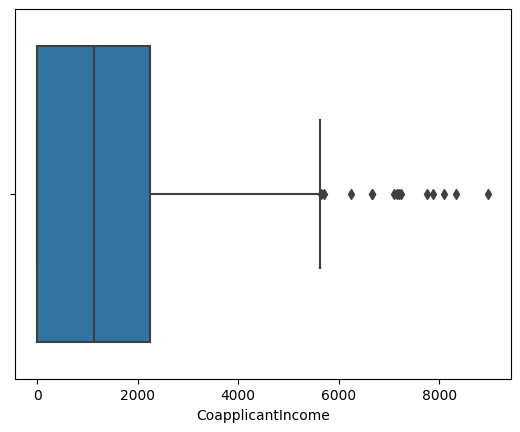

In [8]:
new_data = dataset[dataset["CoapplicantIncome"]<= max_range]
sns.boxplot(x="CoapplicantIncome",data=new_data)
plt.show()

In [7]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000
